In [20]:
import h5py
import numpy as np

with h5py.File('image_data_with_labels.h5', 'r') as hf:
    X = np.array(hf['image_data'])  # Images
    Y = np.array(hf['labels'])      # Labels


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)  
print('Y_test shape:', Y_test.shape)

X_train shape: (374, 149, 302, 4)
X_test shape: (161, 149, 302, 4)
Y_train shape: (374, 4)
Y_test shape: (161, 4)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam # legacy faster on m2 macs
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1:])),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, callbacks=early_stopping, validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 3s 253ms/step - loss: 444.6131 - accuracy: 0.2910 - val_loss: 33.4715 - val_accuracy: 0.2267
Epoch 2/20
10/10 [==============================] - 2s 238ms/step - loss: 33.9534 - accuracy: 0.2809 - val_loss: 1.4039 - val_accuracy: 0.2533
Epoch 3/20
10/10 [==============================] - 2s 229ms/step - loss: 3.0952 - accuracy: 0.2475 - val_loss: 1.3878 - val_accuracy: 0.2400
Epoch 4/20
10/10 [==============================] - 2s 234ms/step - loss: 1.3860 - accuracy: 0.2676 - val_loss: 1.3874 - val_accuracy: 0.2400
Epoch 5/20
10/10 [==============================] - 2s 230ms/step - loss: 1.3858 - accuracy: 0.3311 - val_loss: 1.3871 - val_accuracy: 0.3600
Epoch 6/20
10/10 [==============================] - 2s 225ms/step - loss: 1.3856 - accuracy: 0.3512 - val_loss: 1.3869 - val_accuracy: 0.3600
Epoch 7/20
10/10 [==============================] - 2s 245ms/step - loss: 1.3853 - accuracy: 0.3512 - val_loss: 1.3866 - val_accuracy: 0.3600
Ep

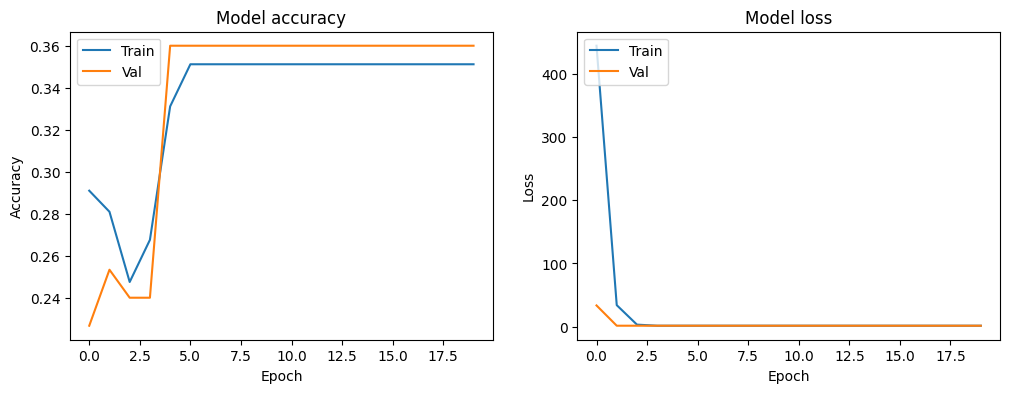

12/12 [==============================] - 1s 52ms/step - loss: 1.3823 - accuracy: 0.3529
Train accuracy: 0.3529411852359772
6/6 [==============================] - 0s 44ms/step - loss: 1.3820 - accuracy: 0.2981
Val accuracy: 0.2981366515159607


In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

print(f'Train accuracy: {model.evaluate(X_train, Y_train)[1]}')
print(f'Val accuracy: {model.evaluate(X_test, Y_test)[1]}')